<a href="https://colab.research.google.com/github/jorgegonzaleza/EjerciciosMachineLearning/blob/main/PrediccionNumeroGoles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICCIÓN NÚMERO DE GOLES

## 1. CARGAR DATASET

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/drive')
df_original=pd.read_csv("/content/drive/MyDrive/Datasets/players_data_light-2024_2025.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_original.head(20)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Yunis Abdelhamid,ma MAR,DF,Saint-Étienne,fr Ligue 1,36.0,1987.0,16,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,24.0,1999.0,32,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Mohamed Abdelmoneim,eg EGY,DF,Nice,fr Ligue 1,25.0,1999.0,12,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Ali Abdi,tn TUN,"DF,MF",Nice,fr Ligue 1,30.0,1993.0,25,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Saud Abdulhamid,sa KSA,DF,Roma,it Serie A,25.0,1999.0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Queremos hacer una predicción de goles esperados, para ello eliminamos defensas y porteros

In [10]:
df=df_original[df_original["Pos"].isin(['FW','MF'])]

In [11]:
df.head(20)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12,Nabil Aberdin,fr FRA,MF,Getafe,es La Liga,21.0,2002.0,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Oliver Abildgaard,dk DEN,MF,Como,it Serie A,28.0,1996.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21.0,2003.0,34,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,18,Tammy Abraham,eng ENG,FW,Roma,it Serie A,26.0,1997.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Tammy Abraham,eng ENG,FW,Milan,it Serie A,26.0,1997.0,28,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,Federico Accornero,it ITA,MF,Genoa,it Serie A,20.0,2004.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,23,Akor Adams,ng NGA,FW,Sevilla,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,24,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,24.0,2000.0,15,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,25,Che Adams,sct SCO,FW,Torino,it Serie A,28.0,1996.0,36,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
count,960.000000,957.000000,957.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1403.020833,24.702194,1998.958203,18.933333,12.603125,1120.319792,12.446354,2.554167,1.376042,3.930208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,816.234608,4.401422,4.406197,12.031490,11.320425,950.318308,10.561631,4.316612,2.084565,5.762625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,15.000000,1985.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,717.750000,21.000000,1996.000000,8.000000,2.000000,223.500000,2.500000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1408.500000,24.000000,1999.000000,20.000000,10.000000,941.500000,10.500000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2087.500000,28.000000,2002.000000,30.000000,22.000000,1913.500000,21.300000,3.000000,2.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2854.000000,38.000000,2008.000000,38.000000,38.000000,3414.000000,37.900000,31.000000,18.000000,47.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 4 to 2853
Columns: 165 entries, Rk to AvgDist
dtypes: float64(61), int64(99), object(5)
memory usage: 1.2+ MB


In [14]:
df.isna().any()

,0
Rk,False
Player,False
Nation,True
Pos,False
Squad,False
...,...
Stp,True
Stp%,True
#OPA,True
#OPA/90,True


## Trabajamos las características con valores nulos

In [15]:
cols_nulas = df.columns[df.isnull().any()].tolist()


In [16]:
cols_nulas

['Nation',
 'Age',
 'Born',
 'SoT%',
 'G/Sh',
 'G/SoT',
 'Dist',
 'npxG/Sh',
 'Cmp%',
 'Tkl%',
 'Succ%',
 'Tkld%',
 'Won%',
 'GA',
 'GA90',
 'SoTA',
 'Saves',
 'Save%',
 'W',
 'D',
 'L',
 'CS',
 'CS%',
 'PKatt_stats_keeper',
 'PKA',
 'PKsv',
 'PKm',
 'PSxG',
 'PSxG/SoT',
 'PSxG+/-',
 '/90',
 'Cmp_stats_keeper_adv',
 'Att_stats_keeper_adv',
 'Cmp%_stats_keeper_adv',
 'Att (GK)',
 'Thr',
 'Launch%',
 'AvgLen',
 'Opp',
 'Stp',
 'Stp%',
 '#OPA',
 '#OPA/90',
 'AvgDist']

In [17]:
df_nulos=df[cols_nulas]

In [18]:
df_nulos.describe()

,Age,Born,SoT%,G/Sh,G/SoT,Dist,npxG/Sh,Cmp%,Tkl%,Succ%,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
count,957.000000,957.000000,828.000000,828.000000,719.000000,828.000000,828.000000,946.000000,831.000000,841.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,24.702194,1998.958203,30.411353,0.083732,0.280334,18.224517,0.098816,76.856448,44.460770,42.825565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.401422,4.406197,18.990448,0.094953,0.246221,5.222888,0.059851,12.539134,22.821849,20.796372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,1985.000000,0.000000,0.000000,0.000000,2.800000,0.010000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,21.000000,1996.000000,20.000000,0.000000,0.000000,14.200000,0.060000,70.800000,33.300000,33.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,24.000000,1999.000000,31.600000,0.070000,0.260000,17.900000,0.090000,78.600000,45.500000,43.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,28.000000,2002.000000,40.000000,0.130000,0.420000,21.900000,0.130000,85.000000,56.300000,51.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,38.000000,2008.000000,100.000000,1.000000,1.000000,40.800000,0.510000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Eliminamos las columnas completamente nulas

In [19]:
cols_vacias = df.columns[df.count() == 0].tolist()
cols_vacias

['GA',
 'GA90',
 'SoTA',
 'Saves',
 'Save%',
 'W',
 'D',
 'L',
 'CS',
 'CS%',
 'PKatt_stats_keeper',
 'PKA',
 'PKsv',
 'PKm',
 'PSxG',
 'PSxG/SoT',
 'PSxG+/-',
 '/90',
 'Cmp_stats_keeper_adv',
 'Att_stats_keeper_adv',
 'Cmp%_stats_keeper_adv',
 'Att (GK)',
 'Thr',
 'Launch%',
 'AvgLen',
 'Opp',
 'Stp',
 'Stp%',
 '#OPA',
 '#OPA/90',
 'AvgDist']

In [20]:
df = df.drop(columns=df.columns[df.count() == 0])
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,0,0,1,0,0,0,0,0,0,NaN
11,12,Nabil Aberdin,fr FRA,MF,Getafe,es La Liga,21.0,2002.0,7,4,...,0,0,4,0,0,0,8,10,3,76.9
12,13,Oliver Abildgaard,dk DEN,MF,Como,it Serie A,28.0,1996.0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21.0,2003.0,34,33,...,30,4,5,0,0,0,83,64,76,45.7
17,18,Tammy Abraham,eng ENG,FW,Roma,it Serie A,26.0,1997.0,1,0,...,0,0,0,0,0,0,0,1,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,2849,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,25.0,1999.0,36,33,...,12,44,37,1,0,0,140,53,32,62.4
2850,2851,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,26.0,1997.0,5,0,...,0,1,4,0,0,0,10,0,0,NaN
2851,2852,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25.0,1998.0,30,26,...,86,6,11,0,0,0,97,8,7,53.3
2852,2853,Milan Đurić,ba BIH,FW,Monza,it Serie A,34.0,1990.0,18,13,...,0,2,1,0,0,0,13,132,50,72.5


### Rellenamos valores nulos con el valor más frecuente de las características numéricas

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

In [22]:
# La clase imputer no admite valores categoricos, eliminamos los atributos categoricos
cols_num = df.select_dtypes(exclude=['object']).columns
df[cols_num]

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%
4,5,18.0,2006.0,1,0,3,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN
11,12,21.0,2002.0,7,4,263,2.9,0,0,0,...,0,0,4,0,0,0,8,10,3,76.9
12,13,28.0,1996.0,1,0,7,0.1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
13,14,21.0,2003.0,34,33,2768,30.8,9,2,11,...,30,4,5,0,0,0,83,64,76,45.7
17,18,26.0,1997.0,1,0,1,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,2849,25.0,1999.0,36,33,2962,32.9,2,1,3,...,12,44,37,1,0,0,140,53,32,62.4
2850,2851,26.0,1997.0,5,0,106,1.2,0,0,0,...,0,1,4,0,0,0,10,0,0,NaN
2851,2852,25.0,1998.0,30,26,2325,25.8,3,8,11,...,86,6,11,0,0,0,97,8,7,53.3
2852,2853,34.0,1990.0,18,13,1270,14.1,4,1,5,...,0,2,1,0,0,0,13,132,50,72.5


In [23]:
# Se le proporcionan los atributos numericos para que calcule los valores
imputer.fit(df[cols_num])

SimpleImputer(strategy='most_frequent')

In [24]:
# Rellenamos los valores nulos
df[cols_num] = imputer.transform(df[cols_num])

In [25]:
cols_nulas = df.columns[df.isnull().any()].tolist()

In [26]:
cols_nulas

['Nation']

### Eliminamos columnas redundantes o irrelevantes

In [27]:
del df["Nation"]

In [28]:
df.isna().any()

,0
Rk,False
Player,False
Pos,False
Squad,False
Comp,False
...,...
OG,False
Recov,False
Won,False
Lost_stats_misc,False


In [29]:
del df["Born"]

In [30]:
del df["Squad"]

In [31]:
del df["Rk"]

In [32]:
jug_gol=df[["Player","Gls"]]

In [33]:
jug_gol

,Player,Gls
4,Keyliane Abdallah,0.0
11,Nabil Aberdin,0.0
12,Oliver Abildgaard,0.0
13,Matthis Abline,9.0
17,Tammy Abraham,0.0
...,...,...
2848,Martín Zubimendi,2.0
2850,Szymon Żurkowski,0.0
2851,Martin Ødegaard,3.0
2852,Milan Đurić,4.0


In [34]:
del df["Player"]

In [35]:
df

,Pos,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,...,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%
4,FW,fr Ligue 1,18.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,MF,es La Liga,21.0,7.0,4.0,263.0,2.9,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,8.0,10.0,3.0,76.9
12,MF,it Serie A,28.0,1.0,0.0,7.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,FW,fr Ligue 1,21.0,34.0,33.0,2768.0,30.8,9.0,2.0,11.0,...,30.0,4.0,5.0,0.0,0.0,0.0,83.0,64.0,76.0,45.7
17,FW,it Serie A,26.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,MF,es La Liga,25.0,36.0,33.0,2962.0,32.9,2.0,1.0,3.0,...,12.0,44.0,37.0,1.0,0.0,0.0,140.0,53.0,32.0,62.4
2850,MF,it Serie A,26.0,5.0,0.0,106.0,1.2,0.0,0.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
2851,MF,eng Premier League,25.0,30.0,26.0,2325.0,25.8,3.0,8.0,11.0,...,86.0,6.0,11.0,0.0,0.0,0.0,97.0,8.0,7.0,53.3
2852,FW,it Serie A,34.0,18.0,13.0,1270.0,14.1,4.0,1.0,5.0,...,0.0,2.0,1.0,0.0,0.0,0.0,13.0,132.0,50.0,72.5


### Conversión características categóricas a numérico

In [36]:
#CONVERTIMOS CATEGÓRICO A NUMÉRICO
df=pd.get_dummies(df,dtype='int')

In [37]:
df=df[df["Min"]>500]
df

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,...,Won,Lost_stats_misc,Won%,Pos_FW,Pos_MF,Comp_de Bundesliga,Comp_eng Premier League,Comp_es La Liga,Comp_fr Ligue 1,Comp_it Serie A
13,21.0,34.0,33.0,2768.0,30.8,9.0,2.0,11.0,8.0,1.0,...,64.0,76.0,45.7,1,0,0,0,0,1,0
18,26.0,28.0,12.0,1183.0,13.1,3.0,4.0,7.0,2.0,1.0,...,36.0,33.0,52.2,1,0,0,0,0,0,1
23,24.0,15.0,13.0,1075.0,11.9,3.0,1.0,4.0,3.0,0.0,...,28.0,27.0,50.9,1,0,0,0,0,1,0
24,28.0,36.0,30.0,2652.0,29.5,9.0,3.0,12.0,9.0,0.0,...,36.0,62.0,36.7,1,0,0,0,0,0,1
25,25.0,28.0,21.0,1965.0,21.8,0.0,3.0,3.0,0.0,0.0,...,31.0,18.0,63.3,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,30.0,26.0,8.0,980.0,10.9,2.0,2.0,4.0,0.0,2.0,...,9.0,3.0,75.0,0,1,0,0,0,0,1
2842,30.0,15.0,10.0,958.0,10.6,2.0,3.0,5.0,2.0,0.0,...,23.0,63.0,26.7,1,0,1,0,0,0,0
2848,25.0,36.0,33.0,2962.0,32.9,2.0,1.0,3.0,2.0,0.0,...,53.0,32.0,62.4,0,1,0,0,1,0,0
2851,25.0,30.0,26.0,2325.0,25.8,3.0,8.0,11.0,2.0,1.0,...,8.0,7.0,53.3,0,1,0,1,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 13 to 2852
Columns: 134 entries, Age to Comp_it Serie A
dtypes: float64(127), int64(7)
memory usage: 645.5 KB


## 2. Separación conjunto de datos

In [39]:
from sklearn.model_selection import train_test_split
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [40]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [41]:
df["Gls"]=df["Gls"].astype(int)
df=df[df["Gls"]>4]

In [42]:
# Dividimos el conjunto de datos
train_set, val_set, test_set = train_val_test_split(df)

In [43]:

X_train, y_train = remove_labels(train_set, 'Gls')
X_val, y_val = remove_labels(val_set, 'Gls')
X_test, y_test = remove_labels(test_set, 'Gls')

### Selección de Características con Random Forest

In [44]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [45]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_train), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(10)

,0
G-PK,0.044017
npxG_stats_shooting,0.025510
xG,0.021684
xG_stats_shooting,0.021247
npxG,0.020863
G+A,0.019890
xG+xAG,0.017170
G-xG,0.017160
Age,0.016699
np:G-xG,0.015886


In [46]:
# Reducimos el conjunto de datos a las 20 características más importantes
features = list(feature_importances_sorted.head(20).index)
X_train_select = X_train[features].copy()
X_val_select = X_val[features].copy()
X_test_select = X_test[features].copy()
x_total_select=df[features].copy()
X_train_select

,G-PK,npxG_stats_shooting,xG,xG_stats_shooting,npxG,G+A,xG+xAG,G-xG,Age,np:G-xG,Tkld%,G+A-PK,npxG+xAG,G/SoT,SoT,Sh,SoT/90,PassLive,Dead,Won%
247,9.0,7.2,7.2,7.2,7.2,13.0,0.57,1.8,26.0,1.8,51.6,0.67,11.2,0.45,20.0,63.0,1.03,44.0,15.0,28.6
1693,15.0,7.5,12.3,12.3,7.5,27.0,0.54,7.7,24.0,7.5,42.3,0.58,15.9,0.44,34.0,79.0,0.90,98.0,149.0,31.5
1990,4.0,3.5,4.2,4.2,3.5,9.0,0.22,0.8,22.0,0.5,41.6,0.24,6.5,0.27,15.0,47.0,0.46,75.0,44.0,45.0
13,8.0,7.7,8.5,8.5,7.7,11.0,0.40,0.5,21.0,0.3,55.8,0.33,11.5,0.31,26.0,73.0,0.85,43.0,26.0,45.7
2201,21.0,14.9,18.9,18.9,14.9,33.0,0.90,6.1,25.0,6.1,40.0,1.10,19.8,0.66,32.0,99.0,1.21,62.0,46.0,42.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,17.0,13.3,20.3,20.3,13.3,35.0,0.97,5.7,31.0,3.7,54.7,0.98,18.6,0.38,45.0,105.0,1.70,59.0,18.0,59.2
1871,6.0,5.4,7.0,7.0,5.4,12.0,0.45,1.0,23.0,0.6,44.8,0.42,9.2,0.35,17.0,50.0,0.71,57.0,26.0,40.0
326,8.0,8.2,8.2,8.2,8.2,8.0,0.55,-0.2,26.0,-0.2,44.7,0.47,9.4,0.35,23.0,49.0,1.35,16.0,4.0,48.5
1650,12.0,13.5,13.5,13.5,13.5,15.0,0.62,-1.5,26.0,-1.5,53.2,0.55,17.8,0.36,33.0,99.0,1.20,58.0,30.0,47.9


## Entrenamiento del Algoritmo

In [47]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=5)

In [48]:
history = model.fit(
    X_train_select, y_train,
)


In [49]:
y_val_pred=model.predict(X_val_select)
y_val_pred.astype('int')

array([15, 21,  8,  8,  5, 10,  6,  8,  8,  6, 11, 15,  8, 19,  7,  5, 15,
        7,  5,  9, 15,  5,  5,  8,  5,  8, 10,  9,  5,  5, 10,  5, 10])

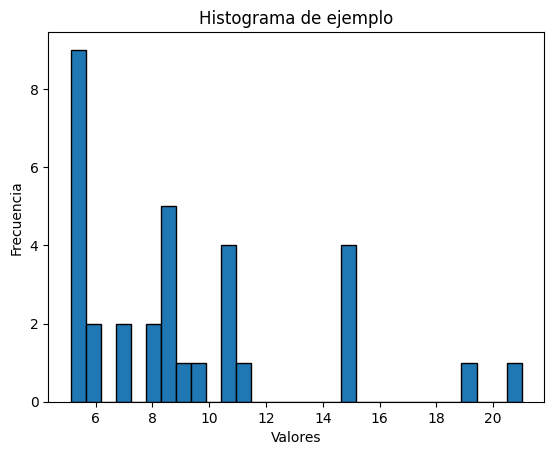

In [50]:

# Crear el histograma
plt.hist(y_val_pred, bins=30, edgecolor='black')  # bins = número de intervalos

# Títulos y etiquetas
plt.title("Histograma de ejemplo")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

# Mostrar gráfico
plt.show()

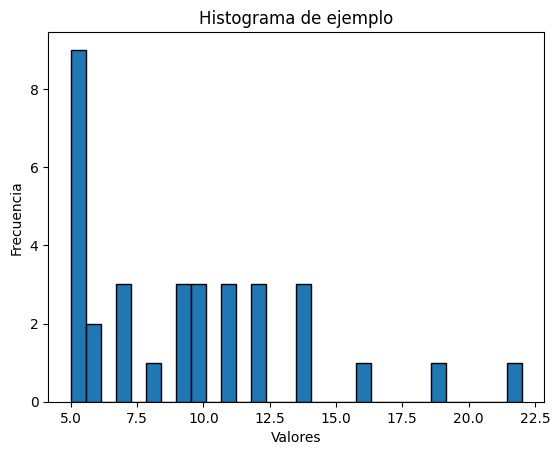

In [51]:
# Crear el histograma
plt.hist(y_val, bins=30, edgecolor='black')  # bins = número de intervalos

# Títulos y etiquetas
plt.title("Histograma de ejemplo")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

# Mostrar gráfico
plt.show()

In [52]:
from sklearn.metrics import r2_score
r2=r2_score(y_val,y_val_pred.astype('int'))
r2

0.8659074947326176

In [53]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_val,y_val_pred.astype('int')))
rmse

np.float64(1.5666989036012806)

In [54]:
y_val

,Gls
670,16
1109,22
1739,11
689,6
416,5
1531,12
1210,7
2479,9
1462,8
854,7


In [55]:
y_val_pred.astype('int')

array([15, 21,  8,  8,  5, 10,  6,  8,  8,  6, 11, 15,  8, 19,  7,  5, 15,
        7,  5,  9, 15,  5,  5,  8,  5,  8, 10,  9,  5,  5, 10,  5, 10])

In [56]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

y=df["Gls"]
model.fit(x_total_select,y)

LinearRegression()

In [57]:
rmse=np.sqrt(mean_squared_error(y,model.predict(x_total_select).astype('int')))
rmse

np.float64(0.7730206825239258)

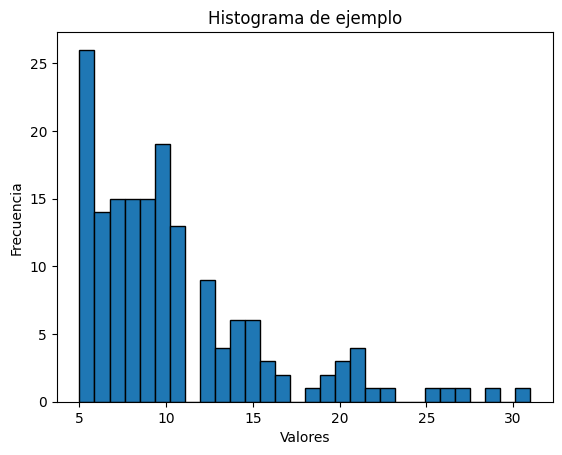

In [58]:
# Crear el histograma
plt.hist(y, bins=30, edgecolor='black')  # bins = número de intervalos

# Títulos y etiquetas
plt.title("Histograma de ejemplo")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

# Mostrar gráfico
plt.show()

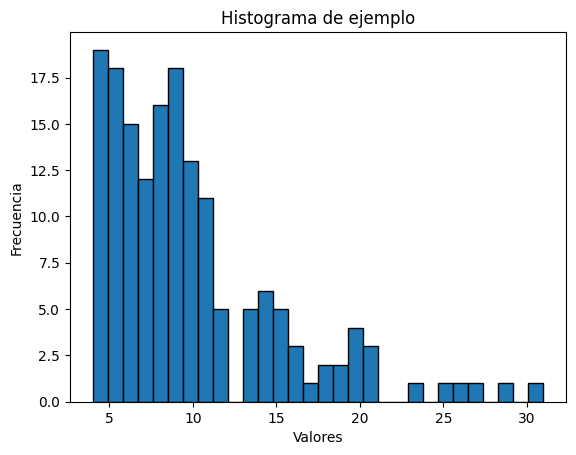

In [59]:
# Crear el histograma
plt.hist(model.predict(x_total_select).astype('int'), bins=30, edgecolor='black')  # bins = número de intervalos

# Títulos y etiquetas
plt.title("Histograma de ejemplo")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

# Mostrar gráfico
plt.show()

In [60]:
r2=r2_score(y,model.predict(x_total_select).astype('int'))
r2

0.9781709920844041

In [61]:
pred=model.predict(x_total_select).astype('int')
pred

array([ 8,  9, 13, 17,  6, 10,  5,  9,  7, 13,  9, 10,  8,  4,  7, 13,  8,
        7,  5,  5, 20, 18,  4,  4,  4,  9,  8,  4,  4,  6, 16,  5, 11, 21,
       15, 13, 11,  7,  6, 11, 14, 13,  6,  9,  7,  6,  5,  5,  4, 10,  7,
        4,  4,  5, 20,  6, 21,  7,  7, 10,  6, 23,  9,  9,  7, 12, 11,  4,
        5,  9, 11, 26, 16, 12, 15, 12,  8,  6, 11, 10, 15,  6,  7,  8, 27,
       11, 14, 10,  5,  8,  6, 14, 11, 14,  4, 31, 20, 11, 11,  4,  4,  7,
        6,  8, 12,  9,  8, 10,  4,  5,  4,  4, 15,  6,  8, 19,  9,  9,  5,
        8,  9, 10, 25,  4, 29, 15, 10,  9,  8, 10, 21,  5, 11,  4,  9,  9,
        6,  8,  8, 10, 12, 14, 10,  5, 19,  5, 14,  6,  6,  9,  8,  8,  5,
        9, 16, 10,  5,  4, 18, 20,  9,  7,  5,  5])

In [62]:
y

,Gls
13,9
24,9
60,13
103,17
114,7
...,...
2787,20
2792,9
2805,8
2811,6


In [63]:


abs_errors = np.abs(y - pred)
print("Errores absolutos:\n", abs_errors)

Errores absolutos:
 13      1
24      0
60      0
103     0
114     1
       ..
2787    0
2792    0
2805    1
2811    1
2815    1
Name: Gls, Length: 164, dtype: int64


In [64]:
fails=abs_errors[abs_errors>0]
fails

,Gls
13,1
114,1
141,1
186,1
238,1
...,...
2770,1
2780,1
2805,1
2811,1


In [65]:
abs_errors.describe()

,Gls
count,164.000000
mean,0.597561
std,0.491891
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [66]:
from sklearn.metrics import mean_absolute_error

# y_true = valores reales
# y_pred = valores predichos

mae = mean_absolute_error(y, pred)
print("Error absoluto medio:", mae)


Error absoluto medio: 0.5975609756097561
